In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy

sympy.init_printing()

In [2]:
t, r, theta, phi, phi_tilde = sympy.symbols("t r theta phi \\tilde{\phi}")

In [3]:
r_tilde, delta_r, delta_theta, W, xi = sympy.symbols("\\tilde{r} Delta_r Delta_theta W Xi")

In [4]:
dt, dr, dtheta, dphi, dphi_tilde, dr_tilde = sympy.symbols(r"dt dr d\theta d\phi d\tilde{\phi} d\tilde{r}")

In [5]:
a, r_tilde_plus, delta = sympy.symbols("a \\tilde{r}_+ \delta")

In [6]:
tau, dtau = sympy.symbols("tau d\\tau")

In [7]:
metric_orig = -delta_r / W * (dt - a * sympy.sin(theta) ** 2 * dphi / xi) ** 2
metric_orig += delta_theta * sympy.sin(theta) ** 2 / W * (a * dt - (r_tilde ** 2 + a ** 2) * dphi / xi) ** 2
metric_orig += W * dr_tilde ** 2 / delta_r
metric_orig

In [8]:
dt_val = sympy.I * dtau

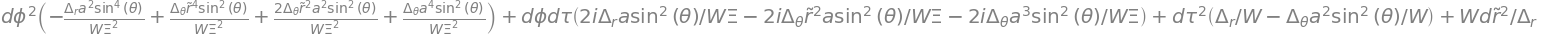

In [9]:
euclidean_metric = metric_orig.subs({dt: dt_val}).expand().collect([dtau ** 2, dtau * dphi, dphi ** 2])
euclidean_metric

In [10]:
omega = sympy.symbols("Omega")
dphi_val = dphi_tilde + omega * dt_val
dphi_val

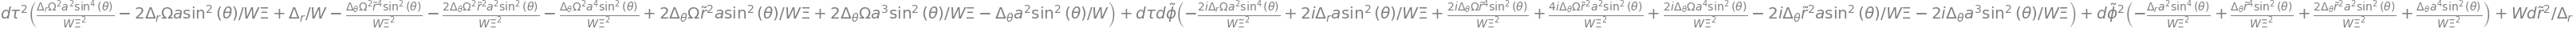

In [11]:
euclidean_metric_2 = euclidean_metric.subs({dphi: dphi_val}).expand().collect([dtau ** 2, dtau * dphi_tilde, dphi_tilde ** 2])
euclidean_metric_2

In [12]:
metric_list_matrix = [[0 for i in range(3)] for i in range(3)]

# tau
metric_list_matrix[0][0] = euclidean_metric_2.coeff(dtau ** 2)
metric_list_matrix[0][1] = euclidean_metric_2.coeff(dtau * dr_tilde) / 2
metric_list_matrix[0][2] = euclidean_metric_2.coeff(dtau * dphi_tilde) / 2

# r_tilde
metric_list_matrix[1][0] = euclidean_metric_2.coeff(dr_tilde * dtau) / 2
metric_list_matrix[1][1] = euclidean_metric_2.coeff(dr_tilde ** 2)
metric_list_matrix[1][2] = euclidean_metric_2.coeff(dr_tilde * dphi_tilde) / 2

# phi_tilde
metric_list_matrix[2][0] = euclidean_metric_2.coeff(dphi_tilde * dtau) / 2
metric_list_matrix[2][1] = euclidean_metric_2.coeff(dphi_tilde * dr_tilde) / 2
metric_list_matrix[2][2] = euclidean_metric_2.coeff(dphi_tilde ** 2)

In [13]:
g_mat = sympy.Matrix(metric_list_matrix)
g_mat.simplify()
g_mat

⎡ 2 ⎛    2    2                      4                     2  2           4⎞  
⎢Ω ⋅⎝Δᵣ⋅a ⋅sin (θ) - Δₜₕₑₜₐ⋅\tilde{r}  - 2⋅Δₜₕₑₜₐ⋅\tilde{r} ⋅a  - Δₜₕₑₜₐ⋅a ⎠⋅s
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                     ⎛  ⎛      2    2                      4                 
⎢                   ⅈ⋅⎝Ω⋅⎝- Δᵣ⋅a ⋅sin (θ) + Δₜₕₑₜₐ⋅\tilde{r}  + 2⋅Δₜₕₑₜₐ⋅\tild
⎢                   ────────────────────────────────

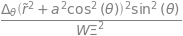

In [14]:
g_mat.det().simplify()

### Generic Metric

In [144]:
A, B, C, D, E, F, G, H = sympy.symbols("A B C D E F G H")

In [171]:
g_mat_simp = sympy.Matrix([[A + sympy.I * B, C + sympy.I * D, 0], [C + sympy.I * D, E + sympy.I * F, 0], [0, 0, G + sympy.I * H]])
g_mat_simp

⎡A + ⅈ⋅B  C + ⅈ⋅D     0   ⎤
⎢                         ⎥
⎢C + ⅈ⋅D  E + ⅈ⋅F     0   ⎥
⎢                         ⎥
⎣   0        0     G + ⅈ⋅H⎦

In [172]:
det_g = g_mat_simp.det().simplify().collect(sympy.I)
det_g

In [177]:
det_g_imag_part = det_g.coeff(sympy.I)
det_g_imag_part

In [178]:
det_g_real_part = det_g - sympy.I * det_g_imag_part
det_g_real_part

In [483]:
C_sol = sympy.solve(det_g_imag_part, C)[0]
C_sol

In [207]:
gamma = sympy.symbols("gamma")
gamma_val = C_sol.args[1].args[0].args[1].args[0]
gamma_val

In [482]:
C_sol_gamma = (-D * G - sympy.sqrt(gamma)) / H
C_sol_gamma

In [267]:
epsilon = sympy.symbols("epsilon")

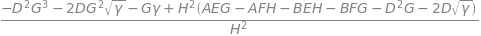

In [210]:
det_g_real_part.subs({C: C_sol_gamma}).expand().simplify()

In [268]:
epsilon_val = det_g_real_part.subs({C: C_sol_gamma}).expand().simplify() * H ** 2
epsilon_val

In [183]:
g_mat_real_simp = sympy.Matrix([[A, C, 0], [C, E, 0], [0, 0, G]])
g_mat_real_simp

⎡A  C  0⎤
⎢       ⎥
⎢C  E  0⎥
⎢       ⎥
⎣0  0  G⎦

In [184]:
g_mat_real_simp.eigenvals()

In [25]:
((A + E) ** 2 / 4 - (C ** 2 + (A - E) ** 2 / 4)).simplify()

In [222]:
sympy.fraction((A * E - C ** 2).subs({C: C_sol_gamma}).expand().simplify())[0].simplify()

In [223]:
g_mat_simp.eigenvals()

In [29]:
list(g_mat_simp.eigenvals().keys())[0].args[2].args[1].args[0].simplify().expand().collect(sympy.I)

In [30]:
real_part_discrim = (A - E) ** 2 - (B - F) ** 2 + 4 * (C ** 2 - D ** 2)
real_part_discrim

In [31]:
imag_part_discrim = 2 * ((A - E) * (B - F) + 4 * C * D)
imag_part_discrim

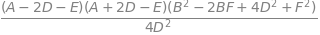

In [32]:
real_part_discrim.subs({C: sympy.solve(imag_part_discrim, C)[0]}).expand().simplify().factor()

### Generic Metric Inverse

In [224]:
g_mat_simp_inv = g_mat_simp.inv()
g_mat_simp_inv.simplify()
g_mat_simp_inv

⎡                   E + ⅈ⋅F                                        -C - ⅈ⋅D   
⎢─────────────────────────────────────────────  ──────────────────────────────
⎢                             2              2                               2
⎢A⋅E + ⅈ⋅A⋅F + ⅈ⋅B⋅E - B⋅F - C  - 2⋅ⅈ⋅C⋅D + D   A⋅E + ⅈ⋅A⋅F + ⅈ⋅B⋅E - B⋅F - C 
⎢                                                                             
⎢                   -C - ⅈ⋅D                                       A + ⅈ⋅B    
⎢─────────────────────────────────────────────  ──────────────────────────────
⎢                             2              2                               2
⎢A⋅E + ⅈ⋅A⋅F + ⅈ⋅B⋅E - B⋅F - C  - 2⋅ⅈ⋅C⋅D + D   A⋅E + ⅈ⋅A⋅F + ⅈ⋅B⋅E - B⋅F - C 
⎢                                                                             
⎢                                                                             
⎢                      0                                              0       
⎣                                                   

In [225]:
denom = g_mat_simp_inv[0, 0].args[0].args[0].collect(sympy.I)
denom

In [226]:
denom_conj = A * E - B * F - C ** 2 + D ** 2 - sympy.I * (A * F + B * E - 2 * C * D)
denom_conj

In [228]:
kappa, delta = sympy.symbols("kappa delta")
kappa_val = (denom * denom_conj).expand().simplify().factor()
kappa_val

In [231]:
delta_val = G ** 2 + H ** 2
delta_val

In [239]:
metric_list_matrix = [[0 for i in range(3)] for i in range(3)]

metric_list_matrix[0][0] = ((E + sympy.I * F) * denom_conj).expand().simplify().collect(sympy.I) / kappa
metric_list_matrix[0][1] = ((-C - sympy.I * D) * denom_conj).expand().simplify().collect(sympy.I) / kappa
metric_list_matrix[1][0] = ((-C - sympy.I * D) * denom_conj).expand().simplify().collect(sympy.I) / kappa
metric_list_matrix[1][1] = ((A + sympy.I * B) * denom_conj).expand().simplify().collect(sympy.I) / kappa
metric_list_matrix[2][2] = (G - sympy.I * H) / delta

g_mat_simp_inv = sympy.Matrix(metric_list_matrix)
g_mat_simp_inv

⎡        2      2    2                2       ⎛     2      2    2             
⎢     A⋅E  + A⋅F  - C ⋅E - 2⋅C⋅D⋅F + D ⋅E + ⅈ⋅⎝- B⋅E  - B⋅F  - C ⋅F + 2⋅C⋅D⋅E 
⎢     ────────────────────────────────────────────────────────────────────────
⎢                                            κ                                
⎢                                                                             
⎢                                  3      2     ⎛                             
⎢-A⋅C⋅E - A⋅D⋅F + B⋅C⋅F - B⋅D⋅E + C  + C⋅D  + ⅈ⋅⎝A⋅C⋅F - A⋅D⋅E + B⋅C⋅E + B⋅D⋅F
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                            κ                                
⎢                                                                             
⎢                                                                             
⎢                                            0                                
⎣                                                   

In [240]:
id = g_mat_simp_inv.subs({kappa: kappa_val, delta: delta_val}) @ g_mat_simp
id.simplify()
id

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [358]:
g_mat_real_simp_inv = [
    [(A * E ** 2 + A * F ** 2 - C ** 2 * E - 2 * C * D * F + D ** 2 * E) / kappa, (-A * C * E - A * D * F + B * C * F - B * D * E + C ** 3 + C * D ** 2) / kappa, 0],
    [(-A * C * E - A * D * F + B * C * F - B * D * E + C ** 3 + C * D ** 2) / kappa, (A ** 2 * E - A * C ** 2 + A * D ** 2 + B ** 2 * E - 2 * B * C * D) / kappa, 0],
    [0, 0, G / delta]
]
g_mat_real_simp_inv = sympy.Matrix(g_mat_real_simp_inv)
g_mat_real_simp_inv

⎡      2      2    2                2                                         
⎢   A⋅E  + A⋅F  - C ⋅E - 2⋅C⋅D⋅F + D ⋅E      -A⋅C⋅E - A⋅D⋅F + B⋅C⋅F - B⋅D⋅E + 
⎢   ───────────────────────────────────      ─────────────────────────────────
⎢                    κ                                           κ            
⎢                                                                             
⎢                                  3      2      2        2      2    2       
⎢-A⋅C⋅E - A⋅D⋅F + B⋅C⋅F - B⋅D⋅E + C  + C⋅D      A ⋅E - A⋅C  + A⋅D  + B ⋅E - 2⋅
⎢──────────────────────────────────────────     ──────────────────────────────
⎢                    κ                                           κ            
⎢                                                                             
⎢                                                                             
⎢                    0                                           0            
⎣                                                   

In [715]:
z = (g_mat_real_simp_inv[0, 0] * g_mat_real_simp_inv[1, 1] * kappa ** 2 - (g_mat_real_simp_inv[0, 1] * kappa) ** 2).expand().factor()
z

In [716]:
z_simp = (A * E - C ** 2) * ((A * F + B * E - 2 * C * D) ** 2 + (A * E - B * F - C ** 2 + D ** 2) ** 2)
z_simp

In [717]:
(z_simp - z).simplify()

This is an expression for $D^2G^2 + 2DG\sqrt{\gamma} + \gamma$.

In [321]:
discrim_dg = (-epsilon + H ** 2 * (A * E * G - A * F * H - B * E * H - B * F * G - D ** 2 * G - 2 * D * sympy.sqrt(gamma))) / G
discrim_dg

#### $g_{00}$ Condition

In [329]:
g_00_cond = sympy.fraction(g_mat_real_simp_inv[0, 0].subs({C: C_sol_gamma}).expand().simplify())[0]
g_00_cond

In [330]:
g_00_cond = sympy.fraction(g_00_cond.subs({D ** 2 * G ** 2 + 2 * D * G * sympy.sqrt(gamma) + gamma: discrim_dg}).expand().simplify())[0]
g_00_cond

In [331]:
g_00_cond = E * epsilon + sum(g_00_cond.args[1:]).factor()
g_00_cond

#### $g_{11}$ Condition

In [332]:
g_11_cond = sympy.fraction(g_mat_real_simp_inv[1, 1].subs({C: C_sol_gamma}).expand().simplify())[0]
g_11_cond

In [333]:
g_11_cond = sympy.fraction(g_11_cond.subs({D ** 2 * G ** 2 + 2 * D * G * sympy.sqrt(gamma) + gamma: discrim_dg}).expand().simplify())[0]
g_11_cond

In [334]:
g_11_cond = (g_11_cond.args[1] + g_11_cond.args[2] + g_11_cond.args[3] + g_11_cond.args[4]).factor() + A * epsilon
g_11_cond

#### Eigenvalues

In [723]:
I, K, M = sympy.symbols("I K M")

g_mat_real_simp_inv_2 = sympy.Matrix([
    [I / kappa, K / kappa, 0],
    [K / kappa, M / kappa, 0],
    [0, 0, G / delta]
])

g_mat_real_simp_inv_2

⎡I  K   ⎤
⎢─  ─  0⎥
⎢κ  κ   ⎥
⎢       ⎥
⎢K  M   ⎥
⎢─  ─  0⎥
⎢κ  κ   ⎥
⎢       ⎥
⎢      G⎥
⎢0  0  ─⎥
⎣      δ⎦

In [725]:
g_mat_real_simp_inv_2.eigenvals()

In [361]:
g_mat_real_simp_inv.eigenvals()

#### Numerical Evaluation

In [727]:
from tqdm import tqdm

bad_matrices = []
sampled_matrices = []
num_sampled_matrices = 0

for i in tqdm(range(10000)):
    # A, E, G > 0
    A_val, E_val, G_val = np.random.uniform(0, 5, size=3)

    # sample imaginary parts
    B_val, D_val, F_val, H_val = np.random.uniform(-5, 5, size=4)

    # C_val = np.random.uniform(-5, 5)
    gamma_val_i = gamma_val.subs({A: A_val, B: B_val, D: D_val, E: E_val, F: F_val, G: G_val, H: H_val}).evalf()
    if gamma_val_i < 0:
        continue
    C_val = ((-D_val * G_val - sympy.sqrt(gamma_val_i)) / H_val).evalf()

    if A_val * E_val < C_val ** 2:
        # it needs to satisfy AE > C^2
        continue

    epsilon_val_i = epsilon_val.subs({A: A_val, B: B_val, C: C_val, D: D_val, E: E_val, F: F_val, G: G_val, H: H_val, gamma: gamma_val_i}).evalf()
    if epsilon_val_i > 0:
        continue

    g_mat_1 = sympy.Matrix([
        [A_val + sympy.I * B_val, C_val + sympy.I * D_val, 0],
        [C_val + sympy.I * D_val, E_val + sympy.I * F_val, 0],
        [0, 0, G_val + sympy.I * H_val]
    ])

    det = g_mat_1.det().evalf()

    g_mat_1_inv = g_mat_1.inv()

    A_val_inv = g_mat_1_inv[0, 0].args[0]
    C_val_inv = g_mat_1_inv[0, 1].args[0]
    E_val_inv = g_mat_1_inv[1, 1].args[0]
    G_val_inv = g_mat_1_inv[2, 2].args[0]
    cond = A_val_inv < 0 or E_val_inv < 0 or G_val_inv < 0 or A_val_inv * E_val_inv < C_val_inv ** 2

    num_sampled_matrices += 1
    sampled_matrices.append([g_mat_1, g_mat_1_inv, det])

    if cond:
        print([g_mat_1, g_mat_1_inv, det])
        bad_matrices.append([g_mat_1, g_mat_1_inv, det])
        break

100%|██████████| 10000/10000 [01:01<00:00, 162.22it/s]


In [515]:
print(len(bad_matrices))
print(num_sampled_matrices)

0
222300


### BH Metric

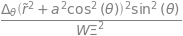

In [46]:
g_mat.det().simplify()

In [47]:
g_mat

⎡ 2 ⎛    2    2                      4                     2  2           4⎞  
⎢Ω ⋅⎝Δᵣ⋅a ⋅sin (θ) - Δₜₕₑₜₐ⋅\tilde{r}  - 2⋅Δₜₕₑₜₐ⋅\tilde{r} ⋅a  - Δₜₕₑₜₐ⋅a ⎠⋅s
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                     ⎛  ⎛      2    2                      4                 
⎢                   ⅈ⋅⎝Ω⋅⎝- Δᵣ⋅a ⋅sin (θ) + Δₜₕₑₜₐ⋅\tilde{r}  + 2⋅Δₜₕₑₜₐ⋅\tild
⎢                   ────────────────────────────────

In [48]:
A = delta_r * (xi - a * omega * sympy.sin(theta) ** 2) ** 2 - delta_theta * (a * xi - omega * (r_tilde ** 2 + a ** 2)) ** 2 * sympy.sin(theta) ** 2
A

In [49]:
(A / (W * xi ** 2) - g_mat[0, 0]).simplify()

In [50]:
C = (r_tilde ** 2 + a ** 2) ** 2 * delta_theta * sympy.sin(theta) ** 2 - delta_r * a ** 2 * sympy.sin(theta) ** 4
C

In [51]:
(C / (W * xi ** 2) - g_mat[2, 2]).simplify()

In [52]:
B = ((omega * a ** 2 * sympy.sin(theta) ** 2 - a * xi) * sympy.sin(theta) ** 2) * delta_r
B

In [53]:
(B / (W * xi ** 2) - (sympy.I * g_mat[0, 2].expand().collect(delta_r).coeff(delta_r)) * delta_r).simplify()

In [54]:
real_delta_r = r_tilde ** 4 - r_tilde_plus ** 4 + (r_tilde_plus - r_tilde) ** 2 * (a + 1) ** 2 + 2 * a * (r_tilde_plus ** 2 - r_tilde ** 2)
real_delta_r

In [55]:
imag_delta_r = 2 * (r_tilde_plus - r_tilde) * (a + 1) * (r_tilde_plus ** 2 - a)
imag_delta_r

In [56]:
xi_val = 1 - a ** 2
xi_val

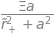

In [57]:
omega_val = a * xi / (r_tilde_plus ** 2 + a ** 2)
omega_val

In [58]:
delta_theta_val = 1 - a ** 2 * sympy.cos(theta) ** 2
delta_theta_val

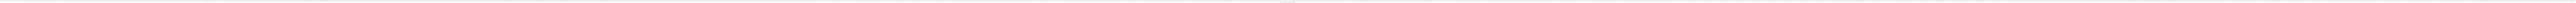

In [59]:
poly = A.subs({delta_r: real_delta_r}) * C.subs({delta_r: real_delta_r}) - (B ** 2).subs({delta_r: imag_delta_r})
poly = poly.subs({omega: omega_val}).subs({xi: xi_val, delta_theta: delta_theta_val}).expand().simplify()
poly

In [60]:
poly_2 = sympy.fraction(poly)[0].args[3].factor().args[2].collect(r_tilde)
poly_2

In [61]:
coeffs = sympy.Poly(poly_2, r_tilde).all_coeffs()
coeffs

In [62]:
coeffs[0].simplify().factor()

In [63]:
A_coeff = coeffs[0].simplify().factor().args[3]
A_coeff

In [64]:
coeffs[1].simplify().factor()

In [65]:
coeffs[2].simplify().factor().args[3].collect(r_tilde_plus)

In [66]:
coeffs_2_r_tilde_plus = sympy.Poly(coeffs[2].simplify().factor().args[3].collect(r_tilde_plus), r_tilde_plus).all_coeffs()
coeffs_2_r_tilde_plus

In [67]:
coeffs_3_r_tilde_plus = sympy.Poly(coeffs[3].simplify().factor().args[3].collect(r_tilde_plus), r_tilde_plus).all_coeffs()
coeffs_3_r_tilde_plus

In [68]:
coeffs[4].simplify().factor()

In [69]:
coeffs[5].simplify().factor()

In [70]:
coeffs_6_r_tilde_plus = sympy.Poly((coeffs[6].simplify().factor() / a ** 2).factor().collect(r_tilde_plus), r_tilde_plus).all_coeffs()
coeffs_6_r_tilde_plus

In [71]:
coeffs[7].simplify().factor()

### Numerical Evaluation

In [72]:
from tqdm import tqdm

In [73]:
def check_if_allowable(poly_cond, A_coeff, a_val, r_tilde_plus_val):
    # check the sign of leading term in r_tilde
    A = A_coeff.subs({a: a_val, r_tilde_plus: r_tilde_plus_val}).evalf()
    if A < 0:
         return False

    # numerically compute the roots
    p = poly_cond.subs({a: a_val, r_tilde_plus: r_tilde_plus_val})
    roots = sympy.solve(p, r_tilde)

    if not roots:
        print(f"No roots found for a = {a_val}, r_tilde_plus = {r_tilde_plus_val}")

    for r in roots:
        if r != sympy.nan:
            if np.abs(r.coeff(sympy.I)) < 1e-10:
                if r.is_real:
                    real_part = r
                else:
                    real_part = r.args[0]
                if real_part > r_tilde_plus_val:
                    return False

    return True


def conduct_sweep(a_vals_grid, r_tilde_plus_vals_grid, theta_val, poly_cond, A_coeff):
    allowable_map = np.zeros(a_vals_grid.shape, dtype=bool)

    # restrict to given theta
    poly_cond_theta = poly_cond.subs({theta: theta_val})
    A_coeff_theta = A_coeff.subs({theta: theta_val})

    with tqdm(total=np.prod(a_vals_grid.shape)) as pbar:
        for i in range(a_vals_grid.shape[0]):
            for j in range(a_vals_grid.shape[1]):
                allowable_map[i, j] = check_if_allowable(
                    poly_cond_theta, A_coeff_theta, a_vals_grid[i, j], r_tilde_plus_vals_grid[i, j]
                )
                pbar.update(1)

    return allowable_map

#### $\theta=\pi/4$

In [74]:
a_vals = np.arange(0, 1.05, 0.05)
r_tilde_plus_vals = np.arange(-1, 1.1, 0.1)
a_vals_grid, r_tilde_plus_vals_grid = np.meshgrid(a_vals, r_tilde_plus_vals)

In [75]:
a_vals_2 = np.arange(0, 1.05, 0.05)
r_tilde_plus_vals_2 = np.arange(-1, 1.05, 0.05)
a_vals_grid_2, r_tilde_plus_vals_grid_2 = np.meshgrid(a_vals_2, r_tilde_plus_vals_2)

In [76]:
a_vals_3 = np.arange(0, 1.025, 0.025)
r_tilde_plus_vals_3 = np.arange(-1, 1.025, 0.025)
a_vals_grid_3, r_tilde_plus_vals_grid_3 = np.meshgrid(a_vals_3, r_tilde_plus_vals_3)

In [77]:
a_vals_4 = np.arange(0, 1.01, 0.01)
r_tilde_plus_vals_4 = np.arange(-1, 1.01, 0.01)
a_vals_grid_4, r_tilde_plus_vals_grid_4 = np.meshgrid(a_vals_4, r_tilde_plus_vals_4)

In [80]:
theta_val = np.pi / 4
allowable_map_pi_4 = conduct_sweep(a_vals_grid, r_tilde_plus_vals_grid, theta_val, poly_2, A_coeff)

100%|██████████| 441/441 [20:46<00:00,  2.83s/it]


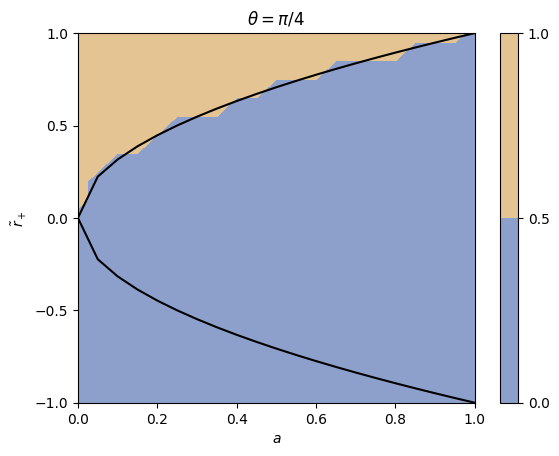

In [81]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, allowable_map_pi_4, cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = \pi/4$');

#### $\theta=\pi/2$

In [82]:
theta_val = np.pi / 2
allowable_map_pi_2 = conduct_sweep(a_vals_grid, r_tilde_plus_vals_grid, theta_val, poly_2, A_coeff)

100%|██████████| 441/441 [10:46<00:00,  1.47s/it]


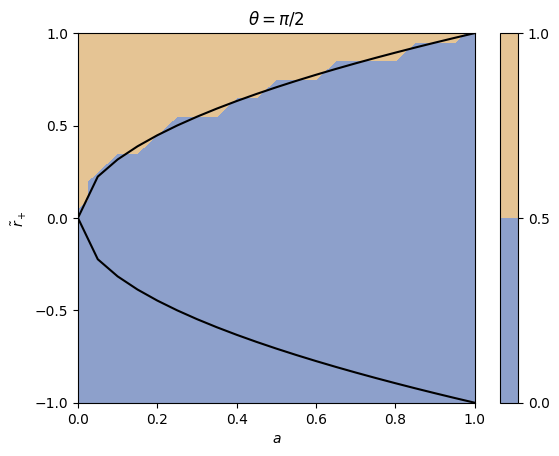

In [83]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, allowable_map_pi_2, cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = \pi/2$');

#### $\theta = 0$

In [84]:
theta_val = 0
allowable_map_0 = conduct_sweep(a_vals_grid, r_tilde_plus_vals_grid, theta_val, poly_2, A_coeff)

  5%|▍         | 20/441 [01:21<32:58,  4.70s/it]

No roots found for a = 1.0, r_tilde_plus = -1.0


100%|██████████| 441/441 [47:02<00:00,  6.40s/it]


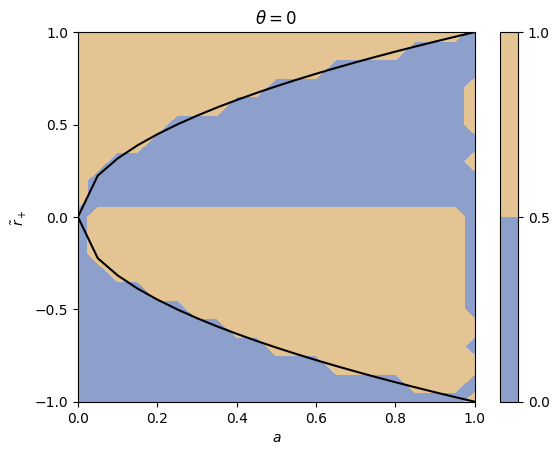

In [85]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, allowable_map_0, cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = 0$');

#### $\theta = \pi/8$

In [86]:
theta_val = np.pi / 8
allowable_map_pi_8 = conduct_sweep(a_vals_grid, r_tilde_plus_vals_grid, theta_val, poly_2, A_coeff)

100%|██████████| 441/441 [31:08<00:00,  4.24s/it]


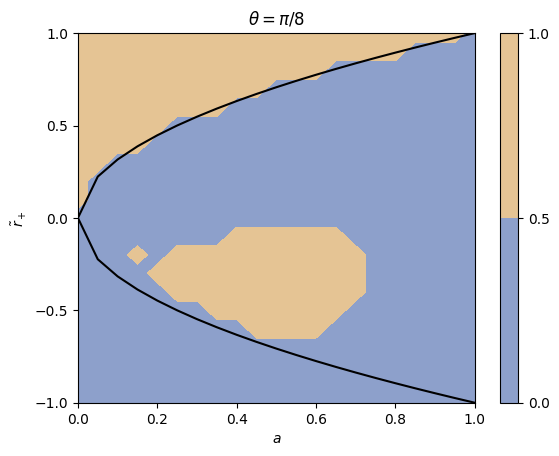

In [87]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, allowable_map_pi_8, cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = \pi/8$');

In [95]:
theta_val = np.pi / 8
allowable_map_pi_8_2 = conduct_sweep(a_vals_grid_2, r_tilde_plus_vals_grid_2, theta_val, poly_2, A_coeff)

100%|██████████| 861/861 [57:48<00:00,  4.03s/it]  


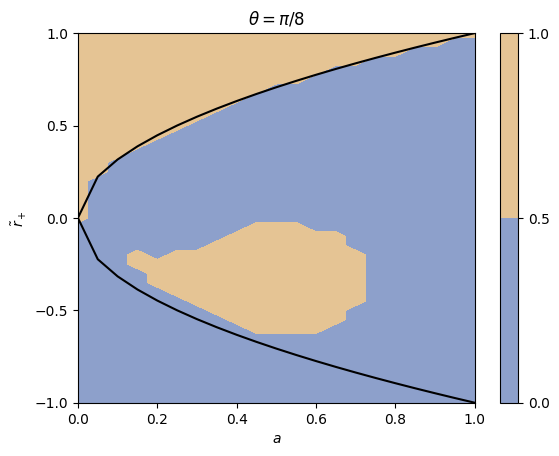

In [96]:
plt.contourf(a_vals_grid_2, r_tilde_plus_vals_grid_2, allowable_map_pi_8_2, cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = \pi/8$');

In [126]:
theta_val = np.pi / 8
allowable_map_pi_8_3 = conduct_sweep(a_vals_grid_3, r_tilde_plus_vals_grid_3, theta_val, poly_2, A_coeff)

100%|██████████| 3321/3321 [9:41:39<00:00, 10.51s/it]    


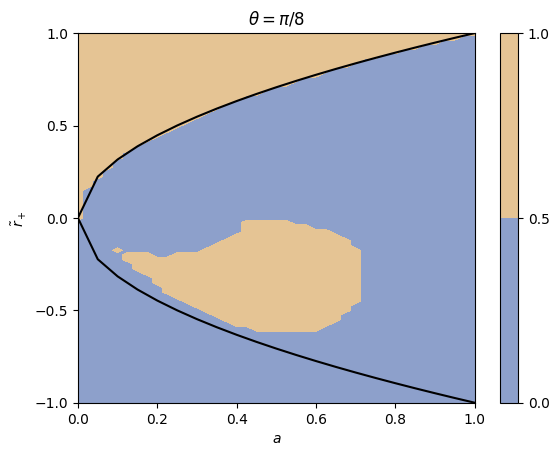

In [127]:
plt.contourf(a_vals_grid_3, r_tilde_plus_vals_grid_3, allowable_map_pi_8_3, cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = \pi/8$');

In [79]:
import allowability
from multiprocessing import Pool

In [83]:
args_parallel = [(poly_2, A_coeff, theta_val, av, rp) for av, rp in zip(a_vals_grid_4.flatten(), r_tilde_plus_vals_grid_4.flatten())]

In [84]:
processes_count = 10

with Pool(processes_count) as pool:
    results = pool.starmap(allowability.check_if_allowable_theta, tqdm(args_parallel, total=len(args_parallel)))

100%|██████████| 20301/20301 [3:23:23<00:00,  1.66it/s]  


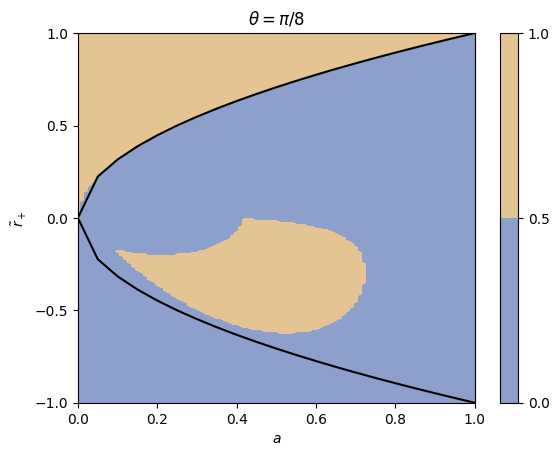

In [142]:
plt.contourf(a_vals_grid_4, r_tilde_plus_vals_grid_4, np.array(results).reshape(a_vals_grid_4.shape), cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = \pi/8$')
plt.savefig('figures/sufficient_condition_parameter_space_theta_pi_8.pdf', bbox_inches='tight', dpi=300);

Spotcheck.

In [126]:
a_val = 0.8
r_tilde_plus_val = -0.25

In [127]:
p = poly.subs({a: a_val, r_tilde_plus: r_tilde_plus_val, theta: theta_val})
roots = sympy.solve(p, r_tilde)

In [128]:
roots

In [129]:
poly_vals = []

r_tilde_vals = np.arange(-10, 10, 0.01)

for r_tilde_val in r_tilde_vals:
    poly_vals.append(p.subs({r_tilde: r_tilde_val}).evalf())

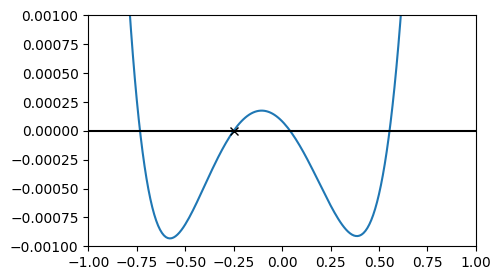

In [130]:
plt.figure(figsize=(5, 3))
plt.plot(r_tilde_vals, poly_vals)
plt.plot(r_tilde_plus_val, 0, 'kx')
plt.ylim([-0.001, 0.001])
plt.plot([-1, 1], [0, 0], 'k-')
plt.xlim([-1, 1]);

Plot the actual determinant of the real part of the metric.

In [141]:
W_val = r_tilde ** 2 + a ** 2 * sympy.cos(theta) ** 2

In [132]:
g2 = g_mat.subs({omega: omega_val, delta_theta: delta_theta_val, W: W_val}).subs({xi: xi_val, delta_r: real_delta_r + sympy.I * imag_delta_r})
g2 = g2.subs({a: a_val, r_tilde_plus: r_tilde_plus_val, theta: theta_val})

In [134]:
g_mat_real_det_vals = []

r_tilde_vals = np.arange(-10, 10, 0.01)

for r_tilde_val in r_tilde_vals:
    g_mat_real_det_vals.append(sympy.re(g2.subs({r_tilde: r_tilde_val}).evalf()).det())

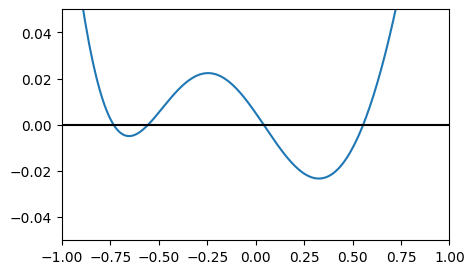

In [143]:
plt.figure(figsize=(5, 3))
plt.plot(r_tilde_vals, g_mat_real_det_vals)
plt.plot([-1, 1], [0, 0], 'k-')
plt.ylim([-0.05, 0.05])
plt.xlim([-1, 1]);

#### $\theta=\pi/6$

In [88]:
theta_val = np.pi / 6
allowable_map_pi_6 = conduct_sweep(a_vals_grid, r_tilde_plus_vals_grid, theta_val, poly_2, A_coeff)

100%|██████████| 441/441 [26:15<00:00,  3.57s/it]


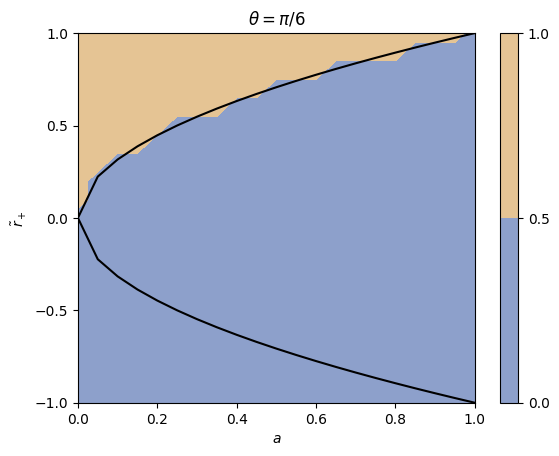

In [89]:
plt.contourf(a_vals_grid, r_tilde_plus_vals_grid, allowable_map_pi_6, cmap='Set2')
plt.plot(a_vals, [sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.plot(a_vals, [-sympy.sqrt(a_val) for a_val in a_vals], 'k-')
plt.xlabel("$a$")
plt.ylabel("$\\tilde{r}_+$")
plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.colorbar()
plt.title('$\\theta = \pi/6$');